In [6]:
import matplotlib.pyplot as plt
import pandas as pd
alldata = pd.read_csv('./drugged/0.csv')
alldata

time        dt      state  ICaL      INaL
0     1998000.000  0.408178 -87.985969  -0.0 -0.000071
1     1998000.005  0.005000 -87.985969  -0.0 -0.000071
2     1998000.010  0.005000 -87.985969  -0.0 -0.000071
3     1998000.015  0.005000 -87.985969  -0.0 -0.000071
4     1998000.020  0.005000 -87.985969  -0.0 -0.000071
...           ...       ...        ...   ...       ...
6995        0.000  0.000000   0.000000   0.0  0.000000
6996        0.000  0.000000   0.000000   0.0  0.000000
6997        0.000  0.000000   0.000000   0.0  0.000000
6998        0.000  0.000000   0.000000   0.0  0.000000
6999        0.000  0.000000   0.000000   0.0  0.000000

[7000 rows x 5 columns]

In [7]:
#remove zeroes
alldata = alldata[(alldata.T != 0).any()]
alldata

time        dt      state  ICaL      INaL
0     1.998000e+06  0.408178 -87.985969  -0.0 -0.000071
1     1.998000e+06  0.005000 -87.985969  -0.0 -0.000071
2     1.998000e+06  0.005000 -87.985969  -0.0 -0.000071
3     1.998000e+06  0.005000 -87.985969  -0.0 -0.000071
4     1.998000e+06  0.005000 -87.985969  -0.0 -0.000071
...            ...       ...        ...   ...       ...
6974  1.999997e+06  1.000000 -87.985911  -0.0 -0.000071
6975  1.999998e+06  1.000000 -87.985912  -0.0 -0.000071
6976  1.999999e+06  1.000000 -87.985912  -0.0 -0.000071
6977  2.000000e+06  1.000000 -87.985912  -0.0 -0.000071
6978  2.000000e+06  0.408109 -87.985912  -0.0 -0.000071

[6979 rows x 5 columns]

In [2]:
# !pip install pandas matplotlib

In [8]:
control = pd.read_csv('./paralel/stresstest/realdeal/0.csv')
control

time        dt    state  ICaL      INaL
0     1998000.000  0.617578 -87.9924  -0.0 -0.000122
1     1998000.005  0.005000 -87.9924  -0.0 -0.000122
2     1998000.010  0.005000 -87.9924  -0.0 -0.000122
3     1998000.015  0.005000 -87.9924  -0.0 -0.000122
4     1998000.020  0.005000 -87.9924  -0.0 -0.000122
...           ...       ...      ...   ...       ...
6995        0.000  0.000000   0.0000   0.0  0.000000
6996        0.000  0.000000   0.0000   0.0  0.000000
6997        0.000  0.000000   0.0000   0.0  0.000000
6998        0.000  0.000000   0.0000   0.0  0.000000
6999        0.000  0.000000   0.0000   0.0  0.000000

[7000 rows x 5 columns]

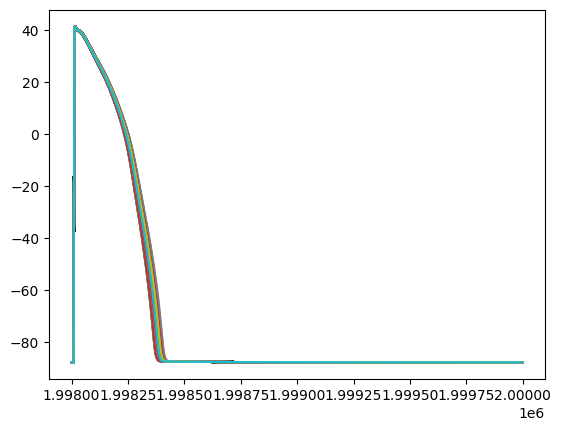

In [10]:
for corenum in range(2000):
    coredata = pd.read_csv('./drugged/'+str(corenum)+'.csv')
    plt.plot(coredata['time'][:6977], coredata['state'][:6977], label = "Sample #"+str(corenum))
    # plt.legend()

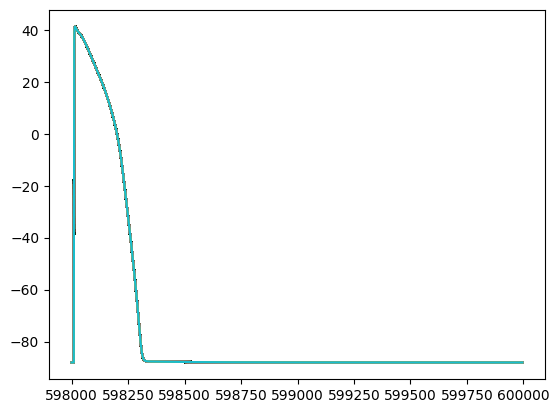

In [17]:
for corenum in range(2000):
    coredata = pd.read_csv('./sober/'+str(corenum)+'.csv')
    plt.plot(coredata['time'][:6977], coredata['state'][:6977], label = "Sample #"+str(corenum))
    # plt.legend()

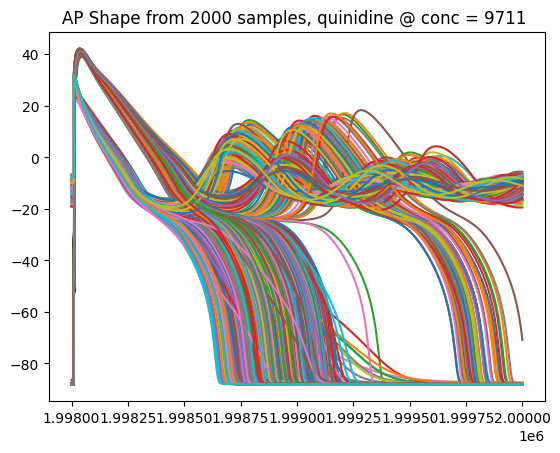

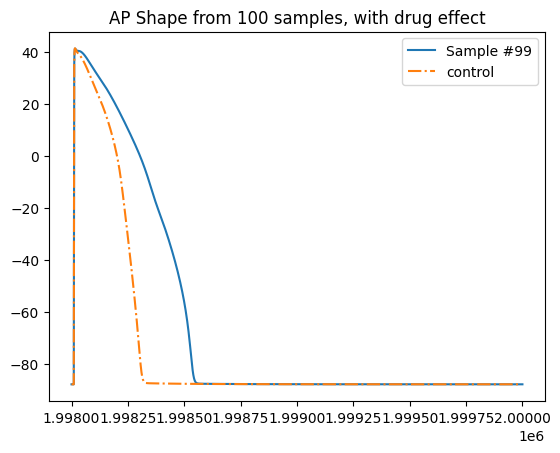

In [10]:
for corenum in range(100):
    coredata = pd.read_csv('./paralel/drugeffect/'+str(corenum)+'.csv')
    # plt.plot(coredata['time'][:6978], coredata['state'][:6978], label = "Sample #"+str(corenum))
    # plt.legend()
plt.plot(coredata['time'][:6978], coredata['state'][:6978], label = "Sample #"+str(corenum))
plt.plot(control['time'][:6978], control['state'][:6978], label = "control", linestyle = 'dashdot')
plt.title("AP Shape from 100 samples, with drug effect")
plt.legend()
plt.show()

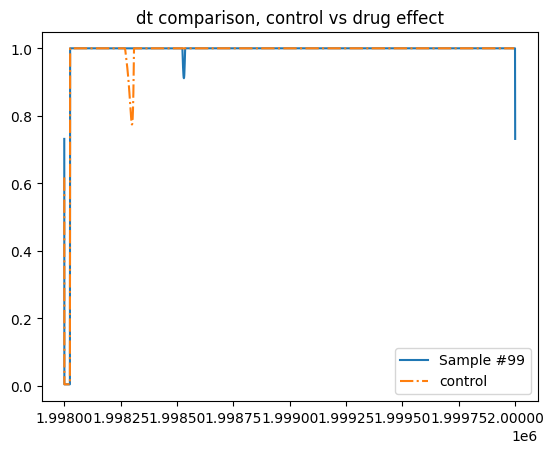

In [11]:
plt.plot(coredata['time'][:6978], coredata['dt'][:6978], label = "Sample #"+str(corenum))
plt.plot(control['time'][:6978], control['dt'][:6978], label = "control", linestyle = 'dashdot')
plt.title("dt comparison, control vs drug effect")
plt.legend()
plt.show()

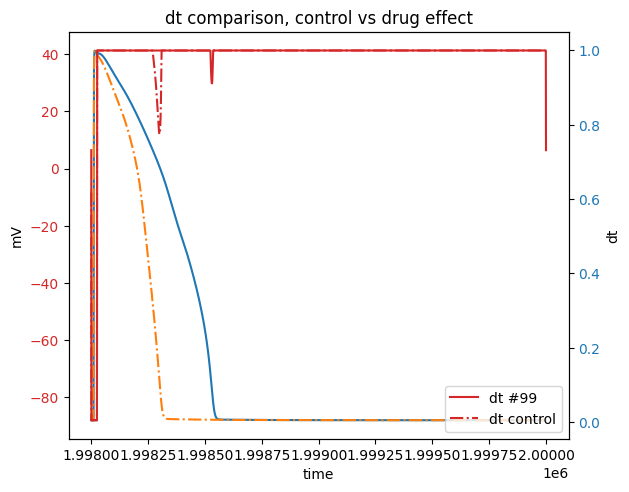

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mV')
ax1.plot(coredata['time'][:6978], coredata['state'][:6978], label = "Sample #"+str(corenum))
ax1.plot(control['time'][:6978], control['state'][:6978], label = "control", linestyle = 'dashdot')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(coredata['time'][:6978], coredata['dt'][:6978], label = "dt #"+str(corenum), color = color)
ax2.plot(control['time'][:6978], control['dt'][:6978], label = "dt control", linestyle = 'dashdot', color=color)
color = 'tab:blue'
ax2.set_ylabel('dt' )  # we already handled the x-label with ax1

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.plot(coredata['time'][:6978], coredata['state'][:6978], label = "Sample #"+str(corenum))
# plt.plot(control['time'][:6978], control['state'][:6978], label = "control", linestyle = 'dashdot')
# plt.plot(coredata['time'][:6978], coredata['dt'][:6978], label = "dt #"+str(corenum))
# plt.plot(control['time'][:6978], control['dt'][:6978], label = "dt control", linestyle = 'dashdot')

plt.title("dt comparison, control vs drug effect")
plt.legend()
plt.show()

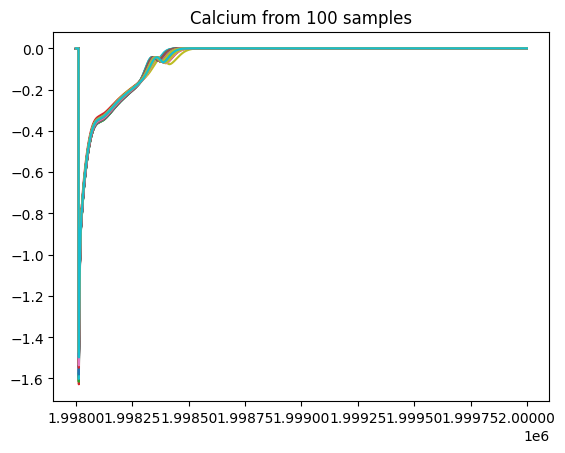

In [3]:
for corenum in range(100):
    coredata = pd.read_csv('./paralel/drugeffect/'+str(corenum)+'.csv')
    plt.plot(coredata['time'][:6978], coredata['ICaL'][:6978], label = "Sample #"+str(corenum))
    # plt.legend()

plt.title("Calcium from 100 samples")
plt.show()

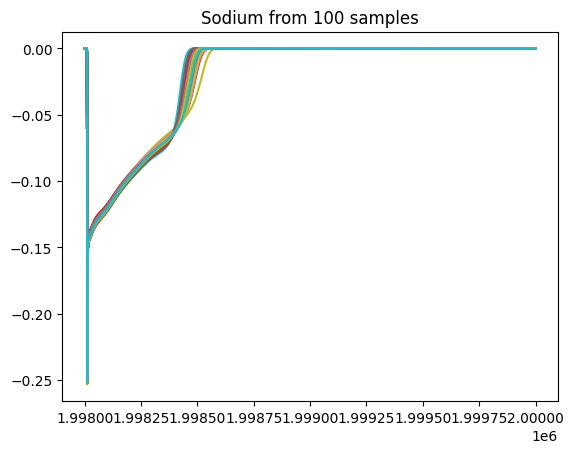

In [5]:
for corenum in range(100):
    coredata = pd.read_csv('./paralel/drugeffect/'+str(corenum)+'.csv')
    plt.plot(coredata['time'][:6978], coredata['INaL'][:6978], label = "Sample #"+str(corenum))
    # plt.legend()

plt.title("Sodium from 100 samples")
plt.show()

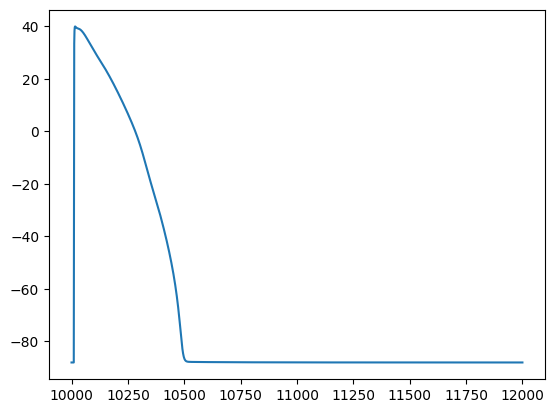

In [3]:
plt.plot(alldata['time'],alldata['state'])


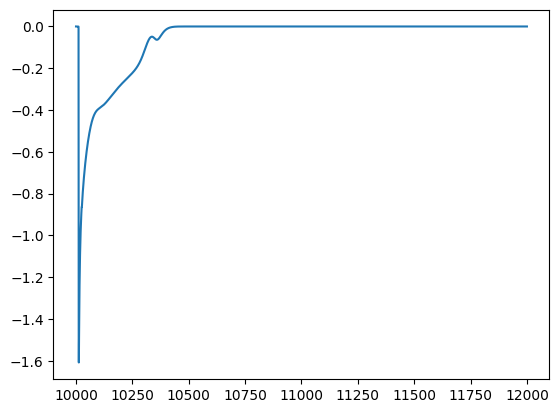

In [10]:
plt.plot(alldata['time'],alldata['ICaL'])


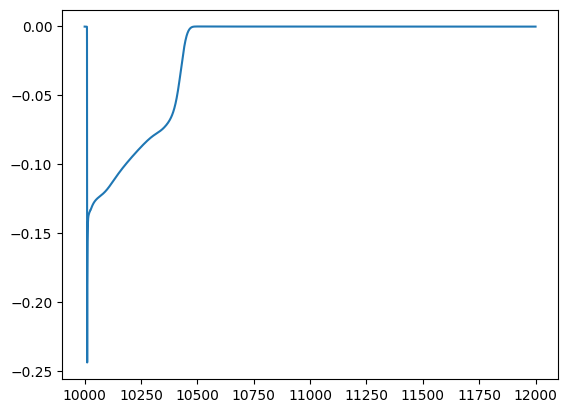

In [11]:
plt.plot(alldata['time'],alldata['INaL'])


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
alldata = pd.read_csv('./chlorpromazine_mods/state_sample0.csv')
alldata

time      state  ICaL     INaL
0   1.998000e+06 -87.992682  -0.0 -0.00012
1   1.998000e+06 -87.993662  -0.0 -0.00012
2   1.998001e+06 -87.993662  -0.0 -0.00012
3   1.998001e+06 -87.993662  -0.0 -0.00012
4   1.998002e+06 -87.993662  -0.0 -0.00012
..           ...        ...   ...      ...
66  1.999522e+06 -87.991211  -0.0 -0.00012
67  1.999622e+06 -87.992298  -0.0 -0.00012
68  1.999722e+06 -87.992979  -0.0 -0.00012
69  1.999822e+06 -87.993373  -0.0 -0.00012
70  1.999922e+06 -87.993563  -0.0 -0.00012

[71 rows x 4 columns]

Text(0.5, 1.0, 'chlorpromazine, mods, 100 cores')

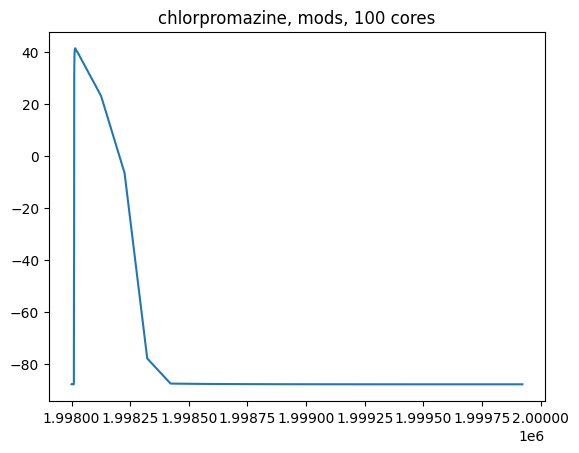

In [9]:
plt.plot(alldata['time'],alldata['state'])
plt.title("chlorpromazine, mods, 100 cores")

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
alldata = pd.read_csv('2000sample_drugeffect.csv')
alldata

core  dt_set         tcurr     states     rates       GKs
0        1510   1.000  1.996000e+06 -87.993535 -0.000000  0.003364
1        1522   1.000  1.996000e+06 -87.995940 -0.000000  0.003368
2        1510   0.005  1.996000e+06 -87.993535 -0.000000  0.003364
3        1522   0.005  1.996000e+06 -87.995940 -0.000000  0.003368
4        1510   0.005  1.996000e+06 -87.993535 -0.000000  0.003364
...       ...     ...           ...        ...       ...       ...
5843083  1989   1.000  1.999063e+06 -87.967254 -0.000089  0.003370
5843084  1990   1.000  1.999079e+06 -87.968173 -0.000084  0.003372
5843085  1991   1.000  1.999054e+06 -87.972077 -0.000090  0.003381
5843086  1992   1.000  1.999082e+06 -87.970006 -0.000083  0.003375
5843087  1993   1.000  1.999016e+06 -87.964339       NaN       NaN

[5843088 rows x 6 columns]

In [36]:
min(alldata['core'])

600

In [32]:
core0 = alldata[alldata['core'] == 1510][['dt_set','tcurr','states']]
core1 = alldata[alldata['core'] == '1'][['dt_set','tcurr','states']]

In [37]:
core0

dt_set         tcurr     states
0         1.000  1.996000e+06 -87.993535
2         0.005  1.996000e+06 -87.993535
4         0.005  1.996000e+06 -87.993535
6         0.005  1.996000e+06 -87.993535
8         0.005  1.996000e+06 -87.993535
...         ...           ...        ...
1198944   1.000  1.999996e+06 -87.993432
1199044   1.000  1.999997e+06 -87.993432
1199144   1.000  1.999998e+06 -87.993432
1199276   1.000  1.999999e+06 -87.993432
1199312   1.000  2.000000e+06 -87.993433

[12069 rows x 3 columns]

Text(0.5, 1.0, 'bepridil, 2000 samples, using printf')

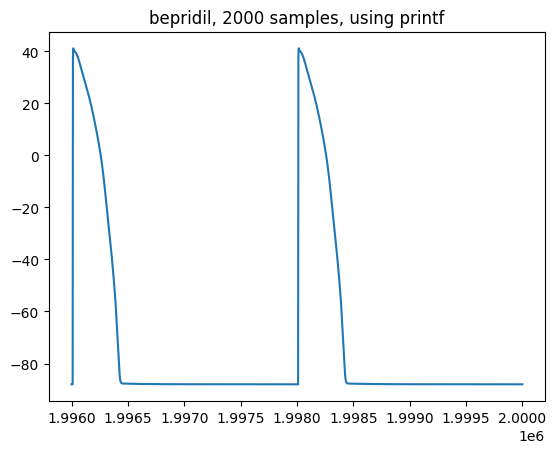

In [34]:
plt.plot(core0['tcurr'],core0['states'])
plt.title("bepridil, 2000 samples, using printf")

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
alldata = pd.read_csv('./state_sample0_test.csv')
alldata

time      state  ICaL      INaL
0   10000.000000 -88.057515  -0.0 -0.000118
1   10000.500000 -88.057515  -0.0 -0.000118
2   10001.000000 -88.057515  -0.0 -0.000118
3   10001.500000 -88.057516  -0.0 -0.000118
4   10002.000000 -88.057516  -0.0 -0.000118
..           ...        ...   ...       ...
66  11622.820907 -88.053892  -0.0 -0.000117
67  11722.820907 -88.054745  -0.0 -0.000118
68  11822.820907 -88.055271  -0.0 -0.000118
69  11922.820907 -88.055564  -0.0 -0.000118
70  12000.000000 -88.055788  -0.0 -0.000117

[71 rows x 4 columns]

Text(0.5, 1.0, 'bepridil, 100 cores (100 samples), 6th peak')

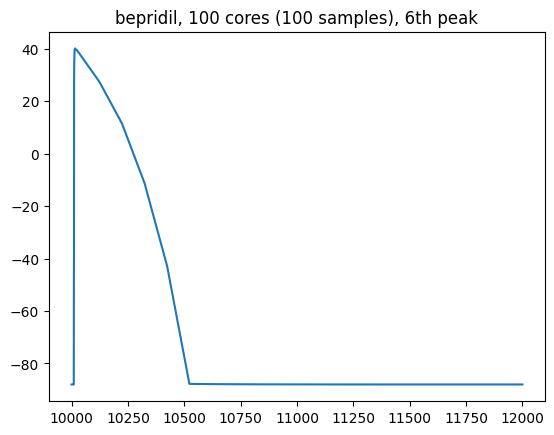

In [39]:
plt.plot(alldata['time'],alldata['state'])
plt.title("bepridil, 100 cores (100 samples), 6th peak")

In [4]:
alldata[alldata['core'] == 0]

core  dt_set        tcurr     states     rates       GKs
0         0   0.005     0.005000 -87.000816 -0.163173  0.003333
3         0   0.005     0.010000 -87.001631 -0.162940  0.003333
6         0   0.005     0.015000 -87.002443 -0.162533  0.003333
9         0   0.005     0.020000 -87.003253 -0.161956  0.003333
12        0   0.005     0.025000 -87.004059 -0.161276  0.003333
...     ...     ...          ...        ...       ...       ...
41850     0   1.000  3996.743272 -88.062800 -0.000002  0.003333
41853     0   1.000  3997.743272 -88.062802 -0.000002  0.003333
41856     0   1.000  3998.743272 -88.062803 -0.000002  0.003333
41859     0   1.000  3999.743272 -88.062805 -0.000002  0.003333
41862     0   1.000  4000.000000 -88.062806 -0.000002  0.003333

[13955 rows x 6 columns]

In [13]:
core0 = alldata[alldata['core'] == '0'][['dt_set','tcurr','states']]
core1 = alldata[alldata['core'] == '1'][['dt_set','tcurr','states']]

In [3]:
core0 = alldata[alldata['core'] == 0][['dt_set','tcurr','states']]
core1 = alldata[alldata['core'] == 1][['dt_set','tcurr','states']]
core2 = alldata[alldata['core'] == 2][['dt_set','tcurr','states']]
core3 = alldata[alldata['core'] == 3][['dt_set','tcurr','states']]
core4 = alldata[alldata['core'] == 4][['dt_set','tcurr','states']]
core5 = alldata[alldata['core'] == 5][['dt_set','tcurr','states']]
core6 = alldata[alldata['core'] == 6][['dt_set','tcurr','states']]
core7 = alldata[alldata['core'] == 7][['dt_set','tcurr','states']]
core8 = alldata[alldata['core'] == 8][['dt_set','tcurr','states']]
core9 = alldata[alldata['core'] == 9][['dt_set','tcurr','states']]

In [5]:
core3 #di core selain 0, si dt set gak berubah

dt_set        tcurr     states
3        0.005     0.005001 -87.000816
13       0.005     0.010001 -87.001631
23       0.005     0.015001 -87.002443
33       0.005     0.020001 -87.003253
43       0.005     0.025001 -87.004060
...        ...          ...        ...
131023   1.000  3149.903528 -88.045393
131033   1.000  3150.903528 -88.045461
131043   1.000  3151.903528 -88.045529
131053   1.000  3152.903528 -88.045597
131063   1.000  3153.903528 -88.045665

[13107 rows x 3 columns]

In [6]:
core1

dt_set        tcurr     states
1        0.005     0.005001 -87.000816
11       0.005     0.010001 -87.001631
21       0.005     0.015001 -87.002443
31       0.005     0.020001 -87.003253
41       0.005     0.025001 -87.004060
...        ...          ...        ...
131031   1.000  3150.755615 -88.046144
131041   1.000  3151.755615 -88.046209
131051   1.000  3152.755615 -88.046274
131061   1.000  3153.755615 -88.046338
131071   1.000  3154.755615 -88.046402

[13108 rows x 3 columns]

In [7]:
core0

dt_set        tcurr     states
0        0.005     0.005001 -87.000816
10       0.005     0.010001 -87.001631
20       0.005     0.015001 -87.002443
30       0.005     0.020001 -87.003253
40       0.005     0.025001 -87.004059
...        ...          ...        ...
131030   1.000  3150.743272 -88.045886
131040   1.000  3151.743272 -88.045951
131050   1.000  3152.743272 -88.046016
131060   1.000  3153.743272 -88.046080
131070   1.000  3154.743272 -88.046145

[13108 rows x 3 columns]

In [8]:
core2

dt_set        tcurr     states
2        0.005     0.005001 -87.000816
12       0.005     0.010001 -87.001631
22       0.005     0.015001 -87.002443
32       0.005     0.020001 -87.003253
42       0.005     0.025001 -87.004060
...        ...          ...        ...
131022   1.000  3149.749690 -88.045823
131032   1.000  3150.749690 -88.045889
131042   1.000  3151.749690 -88.045954
131052   1.000  3152.749690 -88.046020
131062   1.000  3153.749690 -88.046085

[13107 rows x 3 columns]

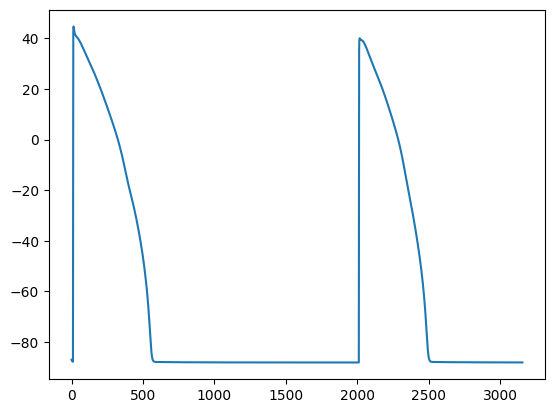

In [9]:
plt.plot(core0['tcurr'],core0['states'])

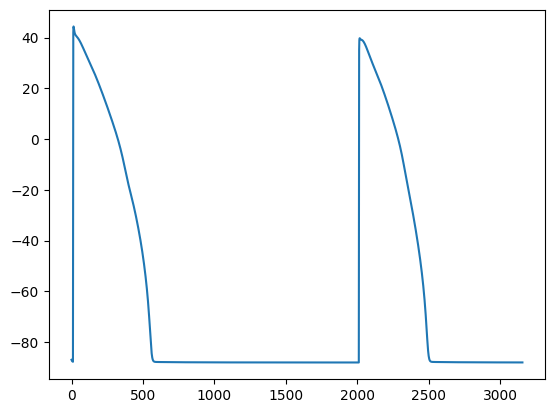

In [10]:
plt.plot(core1['tcurr'],core1['states'])

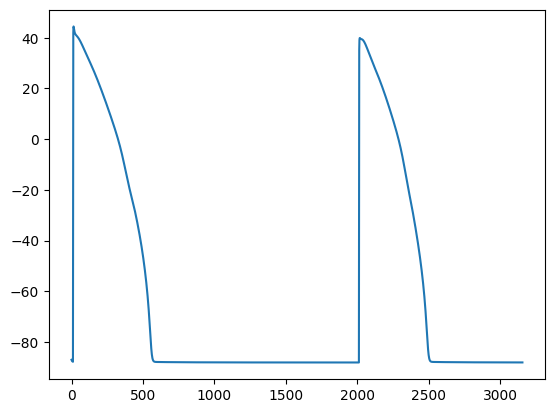

In [11]:
plt.plot(core2['tcurr'],core2['states'])

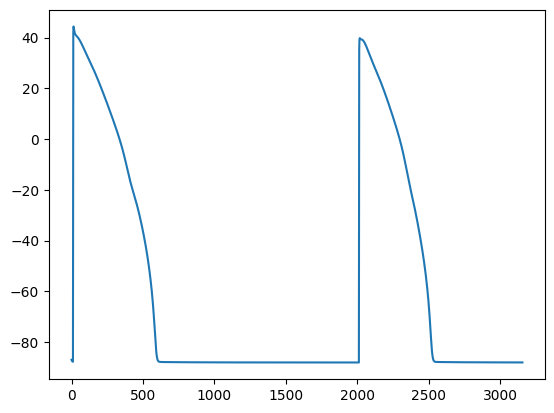

In [12]:
plt.plot(core3['tcurr'],core3['states'])

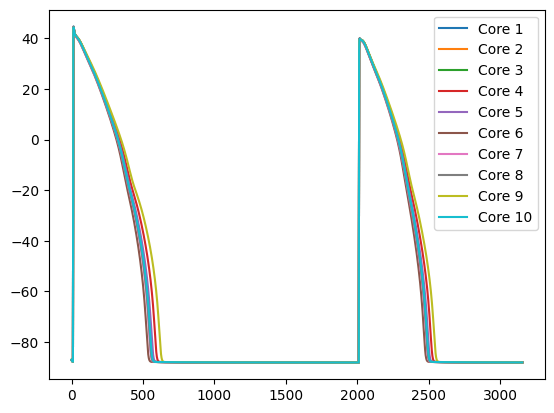

In [17]:
plt.plot(core0['tcurr'],core0['states'], label = 'Core 1')
plt.plot(core1['tcurr'],core1['states'], label = 'Core 2')
plt.plot(core2['tcurr'],core2['states'], label = 'Core 3')
plt.plot(core3['tcurr'],core3['states'], label = 'Core 4')
plt.plot(core4['tcurr'],core4['states'], label = 'Core 5')
plt.plot(core5['tcurr'],core5['states'], label = 'Core 6')
plt.plot(core6['tcurr'],core6['states'], label = 'Core 7')
plt.plot(core7['tcurr'],core7['states'], label = 'Core 8')
plt.plot(core8['tcurr'],core8['states'], label = 'Core 9')
plt.plot(core9['tcurr'],core9['states'], label = 'Core 10')
plt.legend()
plt.show()

In [8]:
!ls

1000pace_conc0.csv               Public
1000sample_100core.csv           audio-orchestrator-ffmpeg
1000sample_drugeffect.csv        bebasid
100sample_100core.csv            codingan_serius
100sample_drugeffect.csv         convolution2d.py
100samples_10core_drugeffect.csv data.zip
100samples_1core_drugeffect.csv  done.csv
100samples_2core_drugeffect.csv  done_1000pace_tail.csv
100samples_50core_drugeffect.csv extension-chrome-notulensi
100samples_5core_drugeffect.csv  extension-chrome-notulensi.zip
10sample_drugeffect.csv          id_ed25519
10samples_limited.csv            id_ed25519.pub
2000sample_100core.csv           miniconda3
2000sample_50core.csv            models
2000sample_drugeffect.csv        new2000sample_50core.csv
2000samples_10core.csv           nltk_data
2000samples_16core.csv           paper_ta
2000samples_5core.csv            parse.ipynb
2000samples_8core.csv            tensorflow_datasets
2samples_5pacemax.csv            test_1000sample.csv
2samples_limited.csv       

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
alldata = pd.read_csv('2000samples_8core.csv', low_memory=False)
alldata

core  dt_set      tcurr     states  rates     GKs
0                           976     1.0  1996000.0 -87.992452   -0.0  0.0034
1                           977     1.0  1996000.0 -87.992452   -0.0  0.0034
2                           978     1.0  1996000.0 -87.992452   -0.0  0.0034
3                           979     1.0  1996000.0 -87.992452   -0.0  0.0034
4                           980     1.0  1996000.0 -87.992452   -0.0  0.0034
...                         ...     ...        ...        ...    ...     ...
8190718                     917     1.0  2000000.0 -87.992348   -0.0  0.0034
8190719                     918     1.0  2000000.0 -87.992348   -0.0  0.0034
8190720                     919     1.0  2000000.0 -87.992348   -0.0  0.0034
8190721  Elapsed time: 912.075s     NaN        NaN        NaN    NaN     NaN
8190722       Sample size: 2000     NaN        NaN        NaN    NaN     NaN

[8190723 rows x 6 columns]

In [15]:
alldata[alldata['core'] == '0'][['dt_set','tcurr','states']]

dt_set         tcurr     states
6481248   0.005  1.996001e+06 -87.992452
6481368   0.005  1.996001e+06 -87.992452
6481458   0.005  1.996001e+06 -87.992452
6481568   0.005  1.996001e+06 -87.992452
6481668   0.005  1.996001e+06 -87.992452
...         ...           ...        ...
6649119   1.000  1.999936e+06 -87.992314
6649149   1.000  1.999937e+06 -87.992315
6649179   1.000  1.999938e+06 -87.992316
6649209   1.000  1.999939e+06 -87.992317
6649239   1.000  1.999940e+06 -87.992318

[3045 rows x 3 columns]

In [11]:
alldata[alldata['core'] == 1][['dt_set','tcurr','states']]

Empty DataFrame
Columns: [dt_set, tcurr, states]
Index: []

In [22]:
core0 = alldata[alldata['core'] == '0'][['dt_set','tcurr','states']]
core1 = alldata[alldata['core'] == '1'][['dt_set','tcurr','states']]
core2 = alldata[alldata['core'] == '2'][['dt_set','tcurr','states']]
core3 = alldata[alldata['core'] == '3'][['dt_set','tcurr','states']]
core4 = alldata[alldata['core'] == '4'][['dt_set','tcurr','states']]
core5 = alldata[alldata['core'] == '5'][['dt_set','tcurr','states']]
core6 = alldata[alldata['core'] == '6'][['dt_set','tcurr','states']]
core7 = alldata[alldata['core'] == '7'][['dt_set','tcurr','states']]
core8 = alldata[alldata['core'] == '8'][['dt_set','tcurr','states']]
core9 = alldata[alldata['core'] == '9'][['dt_set','tcurr','states']]

In [3]:
core0 = alldata[alldata['core'] == 0][['dt_set','tcurr','states']]
core1 = alldata[alldata['core'] == 1][['dt_set','tcurr','states']]
core2 = alldata[alldata['core'] == 2][['dt_set','tcurr','states']]
core3 = alldata[alldata['core'] == 3][['dt_set','tcurr','states']]
core4 = alldata[alldata['core'] == 4][['dt_set','tcurr','states']]
core5 = alldata[alldata['core'] == 5][['dt_set','tcurr','states']]
core6 = alldata[alldata['core'] == 6][['dt_set','tcurr','states']]
core7 = alldata[alldata['core'] == 7][['dt_set','tcurr','states']]
core8 = alldata[alldata['core'] == 8][['dt_set','tcurr','states']]
core9 = alldata[alldata['core'] == 9][['dt_set','tcurr','states']]

In [7]:
core0

dt_set         tcurr     states
22465510   1.000  1.996000e+06 -87.991519
22465561   0.005  1.996000e+06 -87.991519
22465562   0.005  1.996000e+06 -87.991519
22465563   0.005  1.996000e+06 -87.991519
22465564   0.005  1.996000e+06 -87.991519
...          ...           ...        ...
23243940   1.000  1.999996e+06 -87.991414
23243964   1.000  1.999997e+06 -87.991414
23243988   1.000  1.999998e+06 -87.991414
23244011   1.000  1.999999e+06 -87.991414
23244034   1.000  2.000000e+06 -87.991414

[11730 rows x 3 columns]

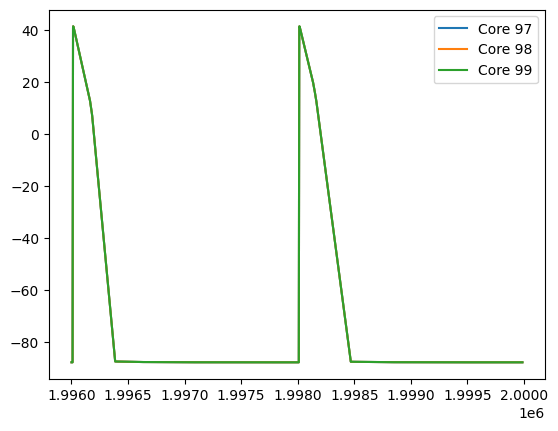

In [24]:
core97 = alldata[alldata['core'] == '97'][['dt_set','tcurr','states']]
core98 = alldata[alldata['core'] == '98'][['dt_set','tcurr','states']]
core99 = alldata[alldata['core'] == '99'][['dt_set','tcurr','states']]
plt.plot(core97['tcurr'],core97['states'], label = 'Core 97')
plt.plot(core98['tcurr'],core98['states'], label = 'Core 98')
plt.plot(core99['tcurr'],core99['states'], label = 'Core 99')
plt.legend()
plt.show()

In [26]:
core0['tcurr']

742438     1.996001e+06
743397     1.996001e+06
743876     1.996003e+06
744228     1.996003e+06
744859     1.996007e+06
               ...     
1907158    1.999781e+06
1907894    1.999782e+06
1908862    1.999783e+06
1909750    1.999784e+06
1910630    1.999785e+06
Name: tcurr, Length: 1050, dtype: float64

In [25]:
core97['tcurr']

843756     1.996000e+06
844412     1.996000e+06
845508     1.996000e+06
846060     1.996000e+06
846948     1.996000e+06
               ...     
2031679    1.999982e+06
2032311    1.999983e+06
2032823    1.999984e+06
2033135    1.999985e+06
2033719    1.999986e+06
Name: tcurr, Length: 1231, dtype: float64

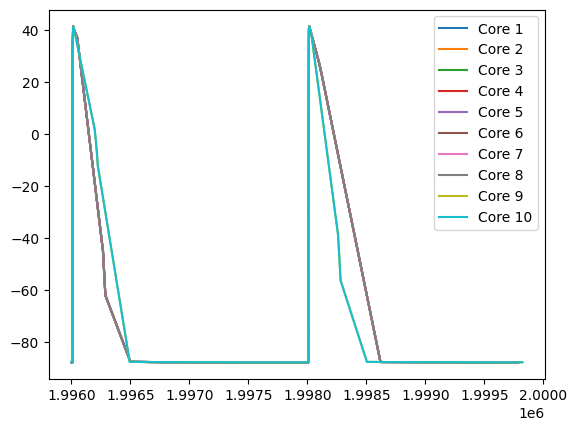

In [23]:
plt.plot(core0['tcurr'],core0['states'], label = 'Core 1')
plt.plot(core1['tcurr'],core1['states'], label = 'Core 2')
plt.plot(core2['tcurr'],core2['states'], label = 'Core 3')
plt.plot(core3['tcurr'],core3['states'], label = 'Core 4')
plt.plot(core4['tcurr'],core4['states'], label = 'Core 5')
plt.plot(core5['tcurr'],core5['states'], label = 'Core 6')
plt.plot(core6['tcurr'],core6['states'], label = 'Core 7')
plt.plot(core7['tcurr'],core7['states'], label = 'Core 8')
plt.plot(core8['tcurr'],core8['states'], label = 'Core 9')
plt.plot(core9['tcurr'],core9['states'], label = 'Core 10')
plt.legend()
plt.show()